<a href="https://colab.research.google.com/github/mariajoseag/Analitica-de-Negocios/blob/main/Reto_2_%C3%81rboles_de_Decisi%C3%B3n_(Aprendizaje_Supervisado)_Maria_Jos%C3%A9_Agudelo_Garc%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 2 Árboles de Decisión (Aprendizaje Supervisado)**

**Descripción de cada una de las variables**


  **Rep:** Una identiﬁcación única para cada representante de ventas. Esta variable se encuentra en la base de datos original y asigna un número a cada uno de los representantes de ventas. Durante el desarrollo del reto no se utilizará esta variable, ya que solo se tomarán en cuenta las siguientes 8 variables socioeconómicas:

* **Business:** Uno de los dos grupos de productos: Hardware (0) y Software (1). Indica los 2 tipos de sectores de producto en los que vende cada empleado. La industria del hardware tiene conocimientos técnicos en productos físicos, mientras que la del software involucra habilidades tales como soluciones digitales.

* **Age:** Indica la edad del empleado, en un rango de los 21 a los 65 años.

* **Female:** Esta variable indica el género del empleado, 1 – Mujer 0 – Hombre.

* **Years:** El número de años que el empleado ha estado en la empresa, su antigüedad, medido de 1 a 13 años.

* **Certificates:** El número de certiﬁcaciones profesionales relevantes que ha obtenido cada empleado. Los certificados de los empleados van de 0 a 6. La cantidad de certificaciones puede ser un indicador de habilidades especializadas de los empleados y su esfuerzo en formación continua.

* **Feedback:** El puntaje de retroalimentación promedio que cada empleado recibe de sus compañeros y supervisor en la evaluación anual de 360 grados. Las puntuaciones posibles van de 0 (la más baja) a 4 (la más alta). En este caso, las puntuaciones de los empleados van de 1,08 a 4. El puntaje obtenido puede estar relacionado con habilidades interpersonales, eficiencia en ventas y la satisfacción del equipo de acuerdo al desempeño.

* **Salary:** Indica el sueldo base anual de cada empleado. En este caso preciso, los salarios van de los 21000 a los 197000.

* **NPS:** El puntaje neto del promotor (NPS) es un indicador clave de la satisfacción y lealtad del cliente. Un NPS alto indica que los clientes recomiendan los servicios del empleado. La puntuación en este caso va de 1 a 10, 1 siendo el más bajo y 10 el más alto.


* **Collage:** Indica si un empleado posee o no un título universitario de 4 años. El indicar si el empleado si tiene un título universitario se muestra como "Yes"(1) y si no lo tiene "No" (0). Esta será la variable de referencia que se utilizará en el desarrolo del reto.


**0.** Se procede con la carga de las librerias de trabajo:

---



In [ ]:
import numpy as np #Esta libreria tiene una serie de funciones numéricas para la transformación de los datos y el análisis
import pandas as pd #Esta libreria permite conectar el sistema con las bases de datos que tengo disponibles en la carpeta content o en drive

#Para la implementación y evaluación del modelo
from sklearn.tree import DecisionTreeClassifier #Del paquete de sklearn se sacan los árboles de decisiones
from sklearn.metrics import confusion_matrix #Del paquete de sklearn importar la matriz de confusión

#Para la carga automática de los archivos desde el drive
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.** Se procede con la carga de la base de datos


---



In [ ]:
nxl='/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/Reto 2/2. TechSalesReport_Int_L.xlsx' #Cargar el archivo de excel desde Google Drive
XDB=pd.read_excel(nxl,sheet_name=0)#La hoja que me interesa es la hoja 0, llamo la hoja 0
XDB.head(100) #Quiero mirar los primeros 100 datos

,Sales_Rep,Business,Age,Female,Years,College,Personality,Certificates,Feedback,Salary,NPS
0,1,Hardware,59,1,2,Yes,Diplomat,1,2.01,70200,5
1,2,Hardware,52,0,10,Yes,Diplomat,4,3.64,133000,10
2,3,Software,47,1,1,Yes,Explorer,1,3.88,52600,8
3,4,Hardware,61,0,2,Yes,Diplomat,3,2.70,96000,6
4,5,Software,39,0,1,No,Diplomat,5,3.44,122000,7
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Software,27,0,2,Yes,Analyst,4,1.58,41000,4
96,97,Hardware,28,0,2,Yes,Sentinel,3,2.70,55000,4
97,98,Hardware,46,1,1,Yes,Sentinel,6,3.34,86800,9
98,99,Hardware,40,0,1,No,Sentinel,5,1.95,49000,6


In [ ]:
#Se hace una copia de la base de datos para realizar su posterior modificación
ND = XDB[['Business', 'Age', 'Female', 'Years', 'Certificates', 'Feedback', 'Salary', 'NPS','College']].copy()

#Convertir los datos de la variable "Business" a valores numéricos, en este caso utilizando la función replace y reemplazando Hardware por cero (0) y Software por uno (1)
ND['Business'] = ND['Business'].replace({'Hardware': 0, 'Software': 1}).infer_objects(copy=False)
#Cambiamos a números la variable College por valores numéricos College: Yes – 1, No - 0
ND['College'] = ND['College'].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)

In [ ]:
#Solo necesitamos 8 variables: 'Business', 'Age', 'Female', 'Years', 'Certificates', 'Feedback', 'Salary', y 'NPS', las seleccionamos
XD=ND[['Business', 'Age', 'Female', 'Years', 'Certificates', 'Feedback', 'Salary', 'NPS']] #XD es el vector de los datos con el cual vamos a trabajar. Cargamos las variables de entrada, 8 en este caso, las socioeconómicas
yd=ND[['College']]#Seleccionamos la variable de referencia o de salida 'College'

**2.** Se procede con la implementación del modelo

---


*Recordar:*

* **max_deph:** es el numero de variables disponibles

* **El Gini:** Es el criterio que indica el grado de error del modelo en la clasificacion de certificación.

In [ ]:
mar=DecisionTreeClassifier(criterion="gini",max_depth=4) #Se le pone al árbol la profundidad de 4 (el max_deph es el numero de variables disponibles) #Y el Gini es el criterio que indica el grado de error del modelo en la clasificacion de certificación
mar.fit(XD,yd)

#Se procede con el despliegue del árbol en formato grapviz
from sklearn.tree import export_graphviz #Exportar archivo
from pydotplus import graph_from_dot_data #Crear el gráfico

vs=["Business", "Age", "Female", "Years", "Certificates", "Feedback", "Salary", "NPS"] #Etiquetar el árbol (nombrarlo)

#Indico ¿Cómo quiero que me exporte el archivo?, en este caso como una imagen .png
dot_data=export_graphviz(mar, feature_names=vs) #Exportarlo con los nombres
graph=graph_from_dot_data(dot_data) #Crear el gráfico
graph.write_png("ÁrbolSalesReport.png") #Asignar el nombre al árbol de decisión

True

**Recordar:** Los nodos mas importantes son los que tengan cero, los nodos puros, indicando porcentaje de certeza del 100%

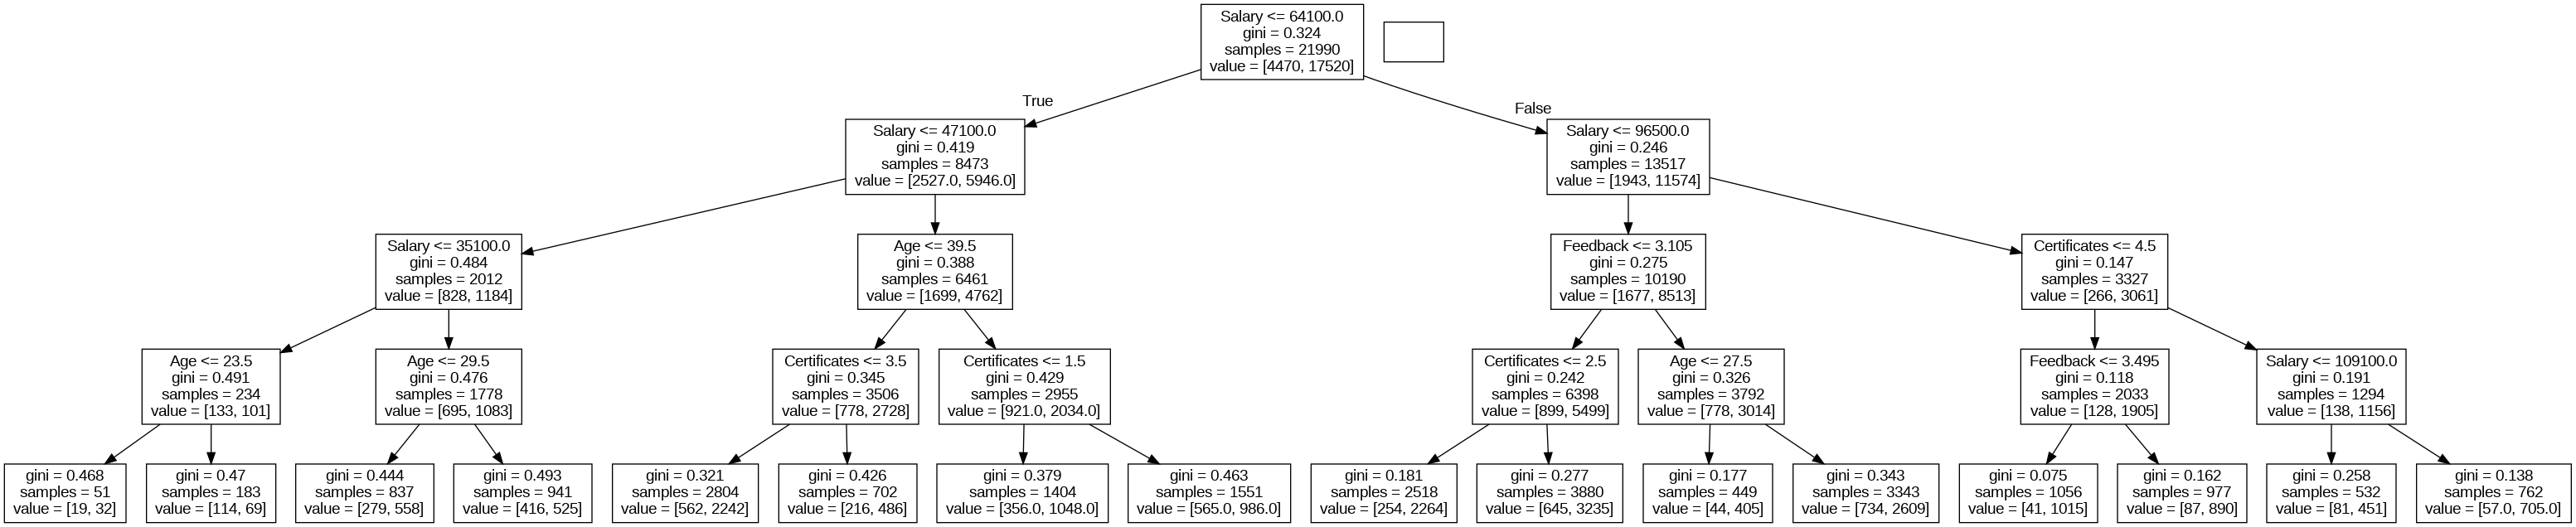


En este caso, el árbol no presenta nodos puros como se pudo observar anteriormente. La ausencia de nodos puros indica que la clasificación no es 100% efectiva.

**3.** Evaluamos el Desempeño del modelo

In [ ]:
ydp=mar.predict(XD)
cm=confusion_matrix(yd,ydp)
print(cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1] #Esta es la matríz de confisión

#Calcular la exactitud del modelo para evaluar el desempeño general del mismo
Ex=(VN+VP)/(VN+VP+FN+FP)
print("La exactitud del modelo es:",Ex)

#Calcular la Tasa de error del modelo, para evaluar cuánto se equivocó el mismo
TE=(FP+FN)/(VN+VP+FN+FP)
print("La tasa de error del modelo es:",TE)

#Calcular la Sensibilidad del modelo para medir el comportamiento del modelo identificando si un empleado posee título universitario
Sen=VP/(VP+FN)
print("La sensibilidad del modelo es:",Sen)

#Calcular la Especificidad del modelo para medir el comportamiento del modelo identificando si un empleado no posee título universitario
Esp=VN/(VN+FP)
print("La especificidad del modelo es:",Esp)

#Calcular la Precisión del modelo para evaluar como se comporta en general el modelo identificando los empleados que posee títulos universitarios
pre=VP/(VP+FP)
print("La precision del modelo es:",pre)

#Calcular la Predicción negativa para evaluar como funciona el modelo reconociendo empleados que no poseen título universitario
pren=VN/(VN+FN)
print("La prediccion negativa del modelo es:",pren)

[[  114  4356]
 [   69 17451]]
La exactitud del modelo es: 0.7987721691678036
La tasa de error del modelo es: 0.20122783083219645
La sensibilidad del modelo es: 0.9960616438356165
La especificidad del modelo es: 0.025503355704697986
La precision del modelo es: 0.8002476269087908
La prediccion negativa del modelo es: 0.6229508196721312


**4.** Creamos el pronóstico del título Universitario para las personas agrupadas en la base de datos de pronóstico

In [ ]:
XDB2 = pd.read_excel(nxl, sheet_name=1) #La hoja que me interesa es la hoja 1, llamo la hoja 1


# Seleccionar variables predictoras para las filas sin información
XDB2['Business'] = XDB2['Business'].replace({'Hardware': 0, 'Software': 1}).infer_objects(copy=False)
XD2 = XDB2[['Business', 'Age', 'Female', 'Years', 'Certificates', 'Feedback', 'Salary', 'NPS']]

# Realizar el pronóstico
ydp2 = mar.predict(XD2)
print("Las predicciones son:\n", ydp2)

# Crear el informe con College pronosticado
dfp = pd.DataFrame(np.column_stack((XD2, ydp2)))
dfp.columns = ['Business', 'Age', 'Female', 'Years', 'Certificates', 'Feedback', 'Salary', 'NPS', 'College']
dfp.head(10)
dfp.to_excel('InformeCollege.xlsx')#Ahora para mandarlo a un excel organizado

from google.colab import files
files.download('InformeCollege.xlsx')

print('Los empleados sin título pronosticados son:', len(np.where(ydp2 == 0)[0]))
print('Los empleados con título pronosticados son:', len(np.where(ydp2 == 1)[0]))


Las predicciones son:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Los empleados sin título pronosticados son: 0
Los empleados con título pronosticados son: 16


Aquí podemos observar el Informe de las predicciones para la hoja "Pronóstico":


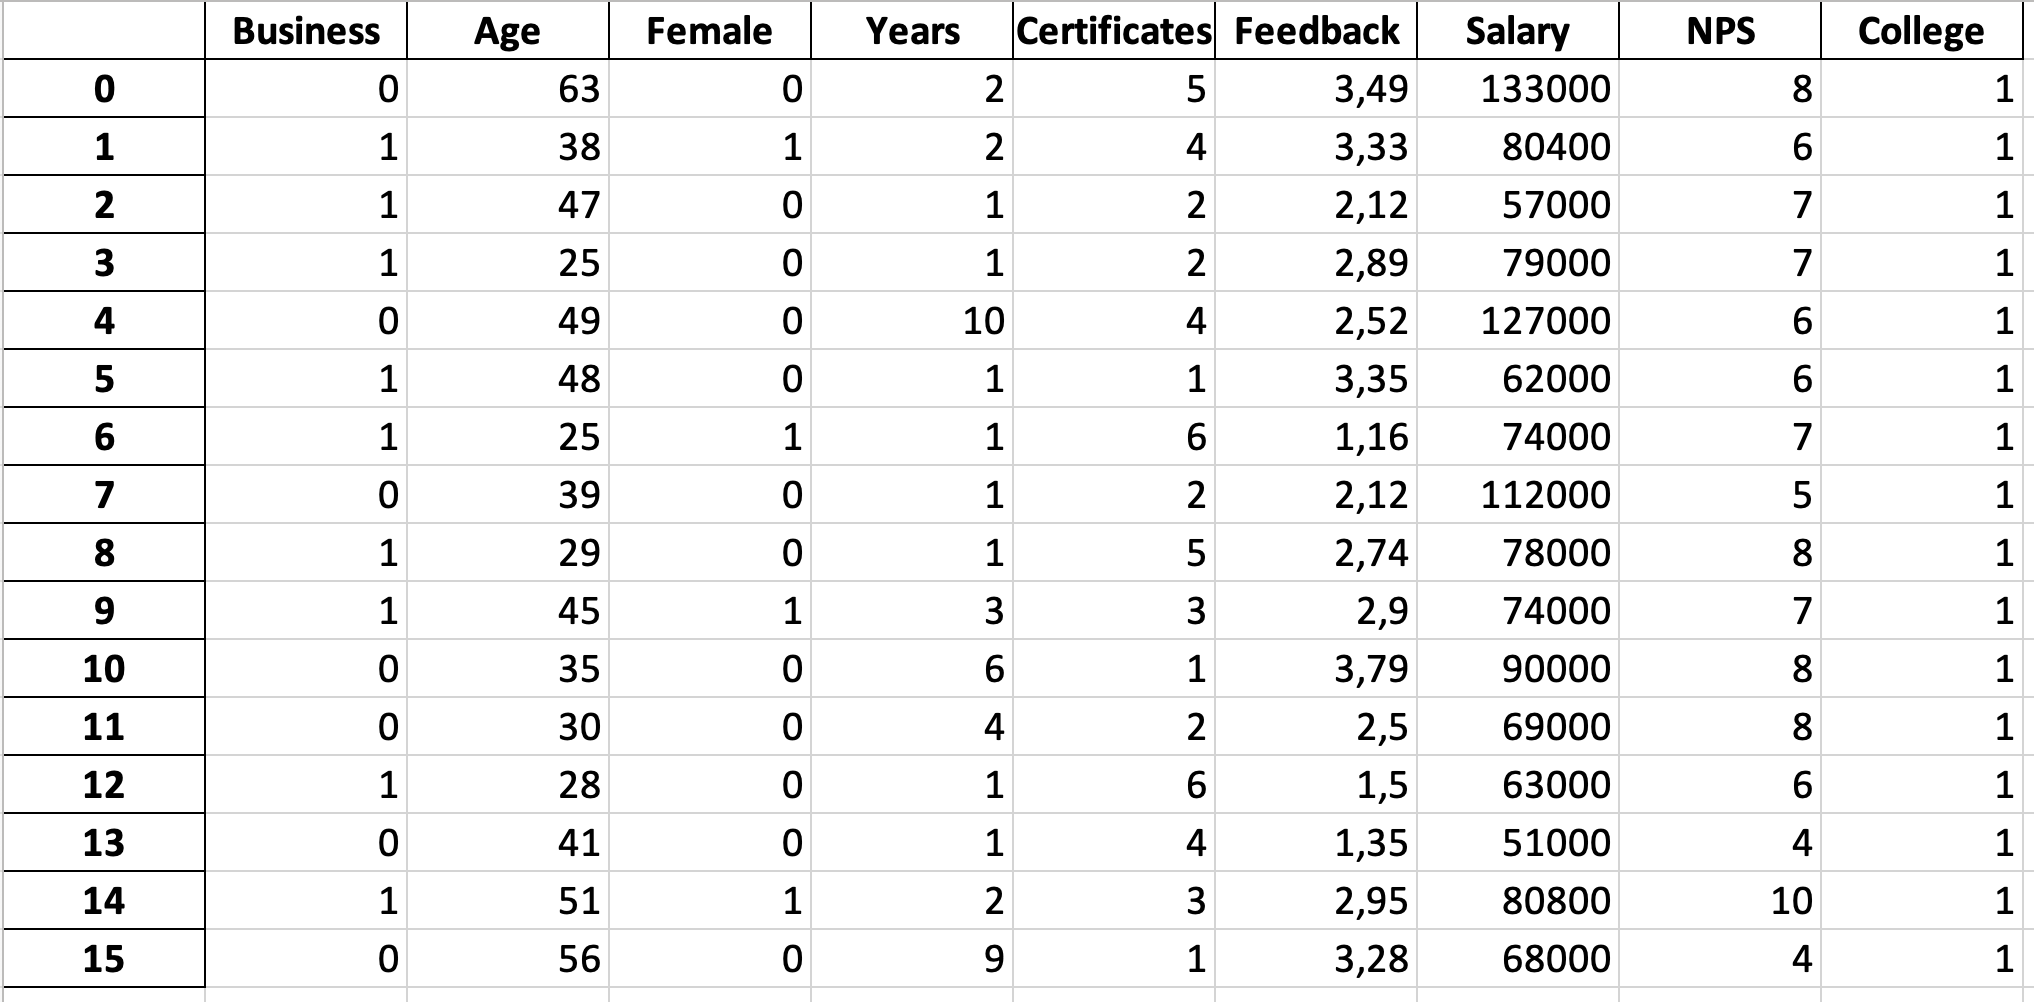



**5.** Llevamos a cabo la caracterización de la base de datos, total de personas, número de personas inscritas y número de personas no escritas utilizando la función Gaussian


In [ ]:
from sklearn.naive_bayes import GaussianNB #En este caso estamos realizando un préstamo interbibliotecario para implementar la función Gaussian

mnb=GaussianNB()
mnb.fit(XD,yd.values.ravel())

#Obtenemos alguna información
ct=mnb.class_count_
print("¿Cómo estan separados los datos?\n", ct) #¿Cómo estan separados los datos?
print("El total de los datos es:\n",len(XD)) #¿Cuál es el total de los datos?
print("Los datos porcentualmente están divididos:\n",ct/len(XD)) #¿Cómo están los datos divididos porcentualmente?


¿Cómo estan separados los datos?
 [ 4470. 17520.]
El total de los datos es:
 21990
Los datos porcentualmente están divididos:
 [0.20327422 0.79672578]


# **Análisis de Resultados**


Para la implementación del modelo de árbol de decisión se tomaron un total de 9 variables, 8 variables de entrada entre las que se destacan 'Business', 'Age', 'Female', 'Years', 'Certificates', 'Feedback', ‘Salary', y ‘NPS’; y una variable de salida que permite evaluar si un empleado posee título universitario o no, 'College' . Para la construcción del modelo se tuvieron un total de 21990 empleados, divididos en 17520 (79,67%) personas que poseen título universitario, y 4470 (20,327%) personas que no poseen un título universitario.

Luego de la ejecución del modelo se logró una exactitud cercana al 80% en promedio lo que esta por encima del 75% de la exactitud optima para la aceptación de un modelo, lo que indica la calidad del modelo en el pronóstico. Es importante destacar que el coeficiente de Sensibilidad para medir el comportamiento del modelo identificando si un empleado posee título universitario estuvo por encima del 99%, y la precisión del modelo para evaluar como se comporta en general el modelo identificando los empleados que posee títulos universitarios fue de más del 80%, valores muy buenos a favor del mismo.

Cabe señalar que la Predicción Negativa para evaluar como funciona el modelo reconociendo empleados que no poseen título universitario fue del 62%, lo que indica que funcionamiento general del modelo estuvo por debajo del 75%.
La Especificidad del modelo para medir el comportamiento del modelo identificando si un empleado no posee título universitario fue muy bajo, tan solo del 25%.
Finalmente, el modelo presentó una tasa de error de tan solo 20%.

El Árbol de Decisión no presenta nodos, esta ausencia de nodos puros indica que la clasificación no es 100% efectiva.

Finalmente, en cuanto al pronóstico del título Universitario para las personas agrupadas en la base de datos de pronóstico, las predicciones indican que de las 16 empleados de la base de datos de pronóstico son empleados con título universitario (Verdadero), dado que las predicciones fueron: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1].